# Shared sequences among individuals

In [1]:
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

In [2]:
cd /Users/kgrigait/Desktop/new_data

/Users/kgrigait/Desktop/new_data


In [3]:
#Load data
TRp_prod_1=pd.read_csv('S1/TRpairs_productive.txt', sep='\t')
TRp_prod_2=pd.read_csv('S2/TRpairs_productive.txt', sep='\t')
TRp_prod_3=pd.read_csv('S3/TRpairs_productive.txt', sep='\t')
TRp_prod_4=pd.read_csv('S4/TRpairs_productive.txt', sep='\t')
TRp_prod_5=pd.read_csv('S5/TRpairs_productive.txt', sep='\t')

In [4]:
#Shared paired alpha beta CDR3 sequences.
#Connect alpha and beta CDR3 sequences into one.
TRp_prod_1['CDR3_AB'] = TRp_prod_1['NSeqCDR3A']+'_'+TRp_prod_1['NSeqCDR3B']
TRp_prod_2['CDR3_AB'] = TRp_prod_2['NSeqCDR3A']+'_'+TRp_prod_2['NSeqCDR3B']
TRp_prod_3['CDR3_AB'] = TRp_prod_3['NSeqCDR3A']+'_'+TRp_prod_3['NSeqCDR3B']
TRp_prod_4['CDR3_AB'] = TRp_prod_4['NSeqCDR3A']+'_'+TRp_prod_4['NSeqCDR3B']
TRp_prod_5['CDR3_AB'] = TRp_prod_5['NSeqCDR3A']+'_'+TRp_prod_5['NSeqCDR3B']

#Get unique CDR3 sequences
CDR3_1=pd.DataFrame(TRp_prod_1.CDR3_AB.unique())
CDR3_2=pd.DataFrame(TRp_prod_2.CDR3_AB.unique())
CDR3_3=pd.DataFrame(TRp_prod_3.CDR3_AB.unique())
CDR3_4=pd.DataFrame(TRp_prod_4.CDR3_AB.unique())
CDR3_5=pd.DataFrame(TRp_prod_5.CDR3_AB.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_p=pd.concat([CDR3_1,CDR3_2,CDR3_3,CDR3_4,CDR3_5],axis=0)
CDR3_p.columns=['CDR3'] #rename the column into a string

shared_paired=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    shared_paired=np.append(shared_paired,sum(CDR3_p.CDR3.value_counts()==i))

In [5]:
# Shared sequences from split paired dataframe.

#Shared alpha CDR3 sequences.
CDR3a_1=pd.DataFrame(TRp_prod_1.NSeqCDR3A.unique())
CDR3a_2=pd.DataFrame(TRp_prod_2.NSeqCDR3A.unique())
CDR3a_3=pd.DataFrame(TRp_prod_3.NSeqCDR3A.unique())
CDR3a_4=pd.DataFrame(TRp_prod_4.NSeqCDR3A.unique())
CDR3a_5=pd.DataFrame(TRp_prod_5.NSeqCDR3A.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_a=pd.concat([CDR3a_1,CDR3a_2,CDR3a_3,CDR3a_4,CDR3a_5],axis=0)
CDR3_a.columns=['CDR3'] #rename the column into a string

alpha_shared=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    alpha_shared=np.append(alpha_shared,sum(CDR3_a.CDR3.value_counts()==i))
    
#Shared beta CDR3 sequences.
#Get unique CDR3 sequences
CDR3b_1=pd.DataFrame(TRp_prod_1.NSeqCDR3B.unique())
CDR3b_2=pd.DataFrame(TRp_prod_2.NSeqCDR3B.unique())
CDR3b_3=pd.DataFrame(TRp_prod_3.NSeqCDR3B.unique())
CDR3b_4=pd.DataFrame(TRp_prod_4.NSeqCDR3B.unique())
CDR3b_5=pd.DataFrame(TRp_prod_5.NSeqCDR3B.unique())

#Concatenate all 5 subjects into one dataframe.
CDR3_b=pd.concat([CDR3b_1,CDR3b_2,CDR3b_3,CDR3b_4,CDR3b_5],axis=0)
CDR3_b.columns=['CDR3'] #rename the column into a string

beta_shared=([]) #initialize an array of paired sequence numbers.
for i in range(2,6):
    #find number of sequences paired among 2,3,4 and 5 subjects and fill the array
    beta_shared=np.append(beta_shared,sum(CDR3_b.CDR3.value_counts()==i))

In [6]:
#Find fraction shared
fraction_p=np.divide(shared_paired,len(CDR3_p.CDR3.value_counts()))
fraction_a=np.divide(alpha_shared,len(CDR3_a.CDR3.value_counts()))
fraction_b=np.divide(beta_shared,len(CDR3_b.CDR3.value_counts()))

#### Figure 5C

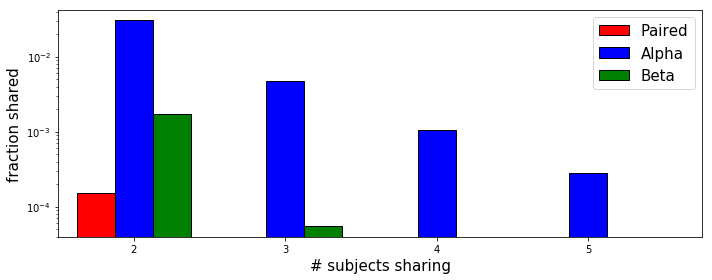

In [7]:
f, ax1 = plt.subplots(1, figsize=(10,4))
pos = list(range(4)) 
width = 0.25 

# positions of the x-axis ticks (center of the bars as bar labels)
ax1.bar(pos, fraction_p, width, color='red', edgecolor='black', label='paired')
ax1.bar([p + width for p in pos], fraction_a, width, color='blue', edgecolor='black', label='alpha')
ax1.bar([p + width*2 for p in pos], fraction_b, width, color='green', edgecolor='black', label='beta')
ax1.xaxis.set_ticks_position('bottom')

plt.yscale('log')
ax1.set_xticks([p + 1 * width for p in pos])
ax1.set_xticklabels(['2','3','4','5'])
ax1.set_ylabel("fraction shared",fontsize=15)
ax1.set_xlabel("# subjects sharing",fontsize=15)
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim(10**0,1)
plt.legend(['Paired', 'Alpha', 'Beta'], loc='upper right', fontsize=15)
plt.tight_layout()

plt.savefig('shared_cdr3_fraction.png')

#### Supplementary Figure 10C

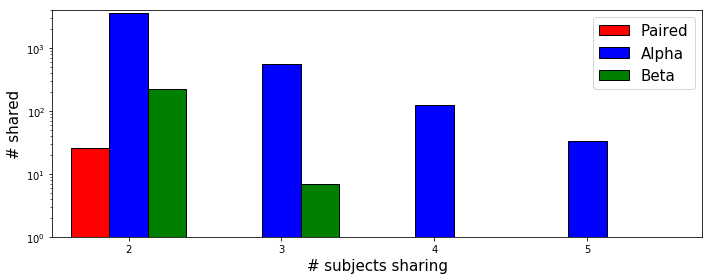

In [8]:
f, ax1 = plt.subplots(1, figsize=(10,4))
pos = list(range(4)) 
width = 0.25 

# positions of the x-axis ticks (center of the bars as bar labels)
ax1.bar(pos, shared_paired, width, color='red', edgecolor='black', label='paired')
ax1.bar([p + width for p in pos], alpha_shared, width, color='blue', edgecolor='black', label='alpha')
ax1.bar([p + width*2 for p in pos], beta_shared, width, color='green', edgecolor='black', label='beta')
ax1.xaxis.set_ticks_position('bottom')

plt.yscale('log')
ax1.set_xticks([p + 1 * width for p in pos])
ax1.set_xticklabels(['2','3','4','5'])
ax1.set_ylabel("# shared",fontsize=15)
ax1.set_xlabel("# subjects sharing",fontsize=15)
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim(10**0,4000)
plt.legend(['Paired', 'Alpha', 'Beta'], loc='upper right', fontsize=15)
plt.tight_layout()

plt.savefig('shared_cdr3.png')

In [9]:
#Shaired pairs per subject
#Connect alpha and beta CDR3 sequences into one.
TRp_prod_1['CDR3_AB'] = TRp_prod_1['NSeqCDR3A']+'_'+TRp_prod_1['NSeqCDR3B']
TRp_prod_2['CDR3_AB'] = TRp_prod_2['NSeqCDR3A']+'_'+TRp_prod_2['NSeqCDR3B']
TRp_prod_3['CDR3_AB'] = TRp_prod_3['NSeqCDR3A']+'_'+TRp_prod_3['NSeqCDR3B']
TRp_prod_4['CDR3_AB'] = TRp_prod_4['NSeqCDR3A']+'_'+TRp_prod_4['NSeqCDR3B']
TRp_prod_5['CDR3_AB'] = TRp_prod_5['NSeqCDR3A']+'_'+TRp_prod_5['NSeqCDR3B']

#Get unique CDR3 sequences
CDR3_1=pd.DataFrame(TRp_prod_1.CDR3_AB.unique())
CDR3_2=pd.DataFrame(TRp_prod_2.CDR3_AB.unique())
CDR3_3=pd.DataFrame(TRp_prod_3.CDR3_AB.unique())
CDR3_4=pd.DataFrame(TRp_prod_4.CDR3_AB.unique())
CDR3_5=pd.DataFrame(TRp_prod_5.CDR3_AB.unique())


df_list=[CDR3_1,CDR3_2,CDR3_3,CDR3_4,CDR3_5]
subject_list=['S1','S2','S3','S4','S5']

In [10]:
#initiate dataframe for frequency heat map that preserves directionality, that is how many CDR3s each subject has
#that are present in another subject.
df_freq_dir=pd.DataFrame(columns=subject_list,index=subject_list)

for i in range(5):
    for j in range(5):
        #for diagonal
        if subject_list[i]==subject_list[j]:
            df_freq_dir.ix[subject_list[j],subject_list[i]]=np.nan
        #for each subject pair 
        else:
            CDR3=pd.concat([df_list[i],df_list[j]],axis=0)
            CDR3.columns=['CDR3']
            #find number of shared sequences and find what fraction it is of the total number of unique
            #equences in each subject.
            df_freq_dir.ix[subject_list[j],subject_list[i]]=sum(CDR3.CDR3.value_counts()==2)/len(df_list[j])

In [11]:
df_freq=pd.DataFrame(columns=subject_list,index=subject_list)

for i in range(5):
    for j in range(5):
        #for diagonal
        if subject_list[i]==subject_list[j]:
            df_freq.ix[subject_list[j],subject_list[i]]=1.0
        # for each subject pair
        else:
            CDR3=pd.concat([df_list[i],df_list[j]],axis=0)
            CDR3.columns=['CDR3']
            # find a fraction of CDR3s present in each subject pair out of the total 26 shared sequences.
            df_freq.ix[subject_list[j],subject_list[i]]=sum(CDR3.CDR3.value_counts()==2)/26

In [12]:
#see which subjects share CDR3s.
df_freq

,S1,S2,S3,S4,S5
S1,1,0.384615,0.269231,0.115385,0
S2,0.384615,1,0.0769231,0.115385,0
S3,0.269231,0.0769231,1,0,0
S4,0.115385,0.115385,0,1,0.0384615
S5,0,0,0,0.0384615,1


In [19]:
#rename columns
CDR3_1.columns=['CDR3']
CDR3_2.columns=['CDR3']
CDR3_3.columns=['CDR3']
CDR3_4.columns=['CDR3']
CDR3_5.columns=['CDR3']

# Subject pairs who have shaired sequences are - 12,13,14,23,24,45
# Have a look at clone size distribution of those shared pairs.
clone_sizes=np.array([])

#S1-S2
#concatenate appropriate dataframes and find all CDR3 that are present twice in the new dataframe,
#which means they are shared between the two individuals.
df=pd.DataFrame(pd.concat([CDR3_1,CDR3_2],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    # for each CDR3 sequence find clone sizes in each individual and update the array.
    clone_sizes=np.append(clone_sizes,len(TRp_prod_1[TRp_prod_1['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_2[TRp_prod_2['CDR3_AB']==df.index[i]]))

#S1-S3
df=pd.DataFrame(pd.concat([CDR3_1,CDR3_3],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    clone_sizes=np.append(clone_sizes,len(TRp_prod_1[TRp_prod_1['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_3[TRp_prod_3['CDR3_AB']==df.index[i]]))

#S1-S4
df=pd.DataFrame(pd.concat([CDR3_1,CDR3_4],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    clone_sizes=np.append(clone_sizes,len(TRp_prod_1[TRp_prod_1['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_4[TRp_prod_4['CDR3_AB']==df.index[i]]))

#S2-S3
df=pd.DataFrame(pd.concat([CDR3_2,CDR3_3],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    clone_sizes=np.append(clone_sizes,len(TRp_prod_2[TRp_prod_2['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_3[TRp_prod_3['CDR3_AB']==df.index[i]]))

#S2-S4
df=pd.DataFrame(pd.concat([CDR3_2,CDR3_4],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    clone_sizes=np.append(clone_sizes,len(TRp_prod_2[TRp_prod_2['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_4[TRp_prod_4['CDR3_AB']==df.index[i]]))

#S4-S5
df=pd.DataFrame(pd.concat([CDR3_4,CDR3_5],axis=0).CDR3.value_counts()==2)
df=df[df.CDR3==True]
for i in range(len(df)):
    clone_sizes=np.append(clone_sizes,len(TRp_prod_4[TRp_prod_4['CDR3_AB']==df.index[i]]))
    clone_sizes=np.append(clone_sizes,len(TRp_prod_5[TRp_prod_5['CDR3_AB']==df.index[i]]))

#### Figure 5E

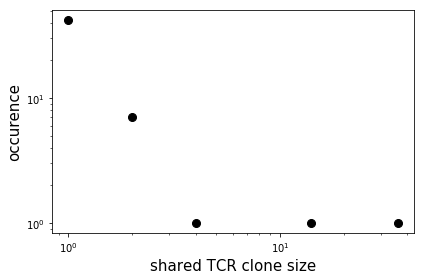

In [14]:
#Determine clone size distribution.
CS, counts = np.unique(clone_sizes,return_counts=True)

#plot clone size distribution of shared pairs.
plt.plot(CS,counts,'o',color='black',markersize=8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('shared TCR clone size',fontsize=15)
plt.ylabel('occurence',fontsize=15)

plt.tight_layout()
plt.savefig('shaired_pairs_clonesizes.png')

In [16]:
#import seaborn for heatmap plotting.
import seaborn as sns

#### Supplementary Figure 10D

/Users/kgrigait/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


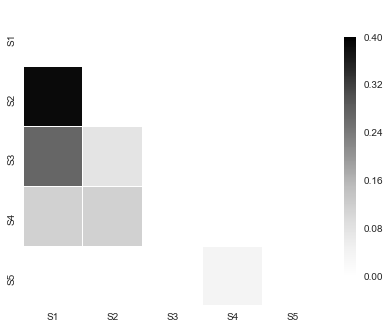

In [17]:
df_freq=df_freq.convert_objects(convert_numeric=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(df_freq, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
with sns.axes_style("white"):
    ax=sns.heatmap(df_freq, mask=mask, cmap=plt.cm.Greys,vmax=0.4,
            square=True, linewidths=.01, cbar_kws={"shrink": .8})
plt.savefig('shared_CDR3s_persubject.png')

#### Figure 5D

/Users/kgrigait/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


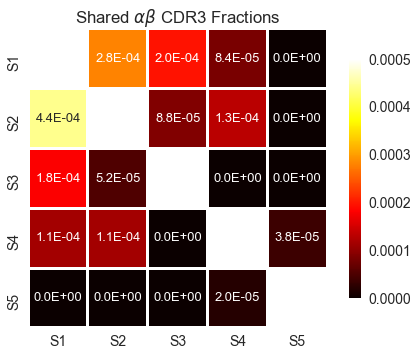

In [18]:
#convert all values to numeric.
df_freq_dir=df_freq_dir.convert_objects(convert_numeric=True)

#set font size.
sns.set(font_scale=1.4)
# Draw the heatmap with the mask and correct aspect ratio
with sns.axes_style("whitegrid"):
    ax=sns.heatmap(df_freq_dir, cmap=plt.cm.hot,vmax=0.0005,
            square=True, linewidths=2, linecolor='white', cbar_kws={"shrink": .8},annot=True,fmt='.1E',annot_kws={"size": 13})

plt.title('Shared ' + r'$\alpha\beta$' + ' CDR3 Fractions')
plt.savefig('shared_CDR3_fractions_persubject.png')